# Conan Shing

## Research Interests:

My background is in integrative physiology research where I have been exposed to both the process of data collection and intial exploratory data analysis where descriptive stats, summary tables, and intial data visuilizations are produced. That intial EDA often involves heavy cleaning of our raw data before being imported in R studio for further analysis. My reserch intrests in my academic life revolve around identify sex differences in physiological responses in male and females, so no better comparrison than identifiying how the ratio of male to female medal holders compare across countries. My personal background is high performance sport, a passio I bring into the lab and my everyday life. As such there is no better data set than olympic results. My research questions are listed and summarized below: 

##  Q1: How does the ratio of male to female medal holders vary across countries. 

To answer this question I aim to compare the ammount of male vs female medla holders in various contries and identify if certain countries house predomenatly female or male medal winners. I first plan to use the medal results data, group by country and identify the number male and female medal holders for each country. From there I hope to identify which country containes the most male and most female medal holders. I would like to present this as a % of men and % of female medal holders so I will need to add a column for each country with the % of male and % of female medal holders. I would also like to see how this % changes over time in each country. I would like to present this as a horizontal bar graph showing cummilitive data and then a seperate line graph comparing the top 25 medal winning countires (over the entire time span of the data set) to compare how their ratio of male:female medal holders change.

## Q2: How does the country with the most medal holders at each game change over time and is this title associated with being the host country. 


To answer this question I plan to summarise the total number of medals attained at each game by country and identify the overall winner. From there I hope to compile a new sumarised data set where each country that attended the games have a total number of medals won where I then hope to plot all attendeing countries over time to see how the medal holding leaders change over time. I would also like to see if this has to do with being the host country that year. To do so I plan to compare avg medals won by non host countries attending the games and avg medals won by host countries. Out of intrest I would also like to see if this changes over time. 

For both my research questions some data wrangling will be needed. I most likely will combine the medal and host data sets to answer my second question and utilize the medals data set for my first. 



In [1]:
# setting up packages

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading data sets

df_athlete = pd.read_csv("../../data/raw/Olympic_Summer_Winter_Games_1986-2022/olympic_athletes.csv")
df_hosts = pd.read_csv("../../data/raw/Olympic_Summer_Winter_Games_1986-2022/olympic_hosts.csv")
df_medals = pd.read_csv("../../data/raw/Olympic_Summer_Winter_Games_1986-2022/olympic_medals.csv")
df_results = pd.read_csv("../../data/raw/Olympic_Summer_Winter_Games_1986-2022/olympic_results.csv")

#df_athlete.head()
#df_hosts.head()
df_medals.head()
#df_results.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
0,Taekwondo,london-2012,58 - 68 kg men,Men,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/rohullah-nikpai,Rohullah NIKPAI,Afghanistan,AF,AFG
1,Taekwondo,beijing-2008,Beijing 2008 Taekwondo - 58 kg men,Men,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/rohullah-nikpai,Rohullah NIKPAI,Afghanistan,AF,AFG
2,Sailing,seoul-1988,Division II - Windsurfer men,Open,SILVER,Athlete,NaN,https://olympics.com/en/athletes/jan-d-boersma,Jan D. BOERSMA,Netherlands Antilles,AN,AHO
3,Athletics,rio-2016,800m men,Men,SILVER,Athlete,NaN,https://olympics.com/en/athletes/taoufik-makhl...,Taoufik MAKHLOUFI,Algeria,DZ,ALG
4,Athletics,rio-2016,1500m men,Men,SILVER,Athlete,NaN,https://olympics.com/en/athletes/taoufik-makhl...,Taoufik MAKHLOUFI,Algeria,DZ,ALG


In [43]:
# Q1 EDA

### creating working df
df = df_medals

### cleaning and wrangling data to prepare to add calculated columns

df['slug_game'] = df['slug_game'].str[-4:]
df = df.rename(columns={'slug_game': 'year'})
df = df.drop(['event_title', 'participant_title', 'athlete_url', 'athlete_full_name', 'country_code', 'country_3_letter_code'], axis = 'columns')

### calculating and creating medal stats 
df['medal_bysex'] = (df.groupby(['medal_type', 'event_gender', 'country_name', 'year'], as_index=False)['medal_type'].transform('count'))
df['medal_total'] = (df.groupby(['medal_type', 'country_name', 'year'], as_index=False)['medal_type'].transform('count'))
df['medal_all'] = (df.groupby(['country_name', 'year'], as_index=False)['medal_type'].transform('count'))
df['medal_%'] = ((df['medal_bysex']/df['medal_total'])*100)
df.sample(10)

### renaming df for future use
medal_bysex = df
medal_bysex
### Sanity check to make sure things are working right
medal_bysex.sample(10)



,discipline_title,year,event_gender,medal_type,participant_type,country_name,medal_bysex,medal_total,medal_all,medal_%
15296,Figure skating,1994,Mixed,SILVER,GameTeam,Russian Federation,4,10,27,40.000000
18307,Shooting,1956,Men,GOLD,Athlete,Soviet Union,38,46,119,82.608696
15059,Fencing,2004,Men,BRONZE,GameTeam,Russian Federation,26,37,95,70.270270
1032,Alpine Skiing,1960,Men,SILVER,Athlete,Austria,4,4,9,100.000000
289,Diving,2008,Women,SILVER,GameTeam,Australia,8,17,52,47.058824
13004,Cross Country Skiing,2014,Women,GOLD,GameTeam,Norway,5,12,27,41.666667
16147,Modern Pentathlon,1968,Men,GOLD,Athlete,Sweden,2,5,12,40.000000
5069,Judo,2020,Women,SILVER,Athlete,France,9,13,37,69.230769
15792,Figure skating,1924,Men,BRONZE,Athlete,Switzerland,12,12,29,100.000000
17596,Archery,1976,Women,SILVER,Athlete,Soviet Union,14,50,162,28.000000


[Text(0, 0.5, 'Number of Medals'),
 Text(0.5, 0, 'Countries'),
 Text(0.5, 1.0, 'Which Country Has Won the Most Medals at a Single Games')]

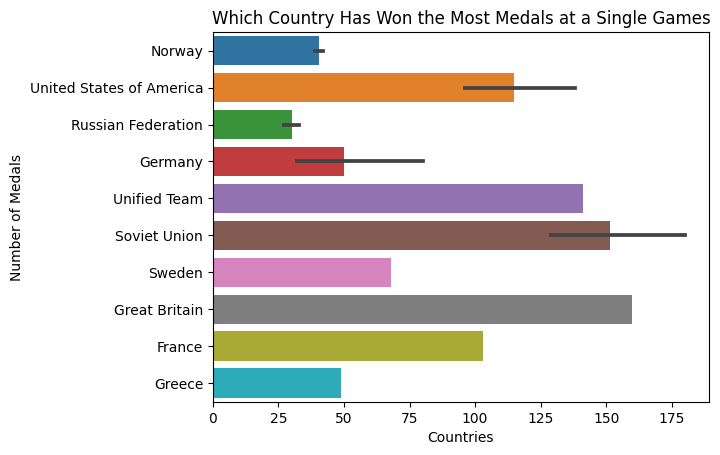

In [42]:
#### Q1 data vis

# show number of total medals won over time by country_name x = year, y = medal_all, groupby country name

In [16]:
### Q2 EDA

df = medal_bysex

df = df.sort_values(by=['medal_all'], ascending = False).groupby('year').head(1).reset_index()
df = df.drop(['index'], axis= "columns")
df = df.sort_values(by = ['year'], ascending = False)

# This code shows the top country without repeats but I feel its better to show the top countries every year 
#df = df.groupby('country_name', group_keys=False).apply(lambda x: x.loc[x.medal_all.idxmax()]).sort_values('medal_all',ascending = False).groupby('year')#.head(1)

df


,discipline_title,year,event_gender,medal_type,participant_type,country_name,medal_bysex,medal_total,medal_all,medal_%
32,Cross Country Skiing,2022,Men,BRONZE,Athlete,Norway,9,13,39,69.230769
13,Diving,2020,Women,SILVER,GameTeam,United States of America,23,44,118,52.272727
29,Speed skating,2018,Men,GOLD,GameTeam,Norway,11,15,42,73.333333
8,Cycling BMX,2016,Women,SILVER,Athlete,United States of America,17,40,127,42.500000
33,Freestyle Skiing,2014,Men,BRONZE,Athlete,Russian Federation,4,10,33,40.000000
16,Wrestling,2012,Men,GOLD,Athlete,United States of America,19,50,112,38.000000
31,Freestyle Skiing,2010,Women,GOLD,Athlete,United States of America,2,9,39,22.222222
15,Swimming,2008,Women,SILVER,Athlete,United States of America,24,39,116,61.538462
34,Biathlon,2006,Women,BRONZE,Athlete,Germany,3,6,32,50.000000
19,Swimming,2004,Men,BRONZE,Athlete,United States of America,11,28,106,39.285714


In [ ]:
#### Confirming all the unique years and dates are right. Intrestingly I found several gabs in the years of the games,
#### some of the presumably because of world wars or potentially due to errors in data collection 

#x = df_medals.slug_game.unique().tolist()
#x.sort()
#x

In [ ]:
# Q2 EDA

### To determine how a host country performs I will need to merge my data frames together

df1 = df_hosts
df2 = df_medals

### preparing df_hosts for merge 
df1 = df1.drop(['game_slug', 'game_end_date', 'game_start_date', 'game_name'], axis = 'columns').rename(columns={'game_year' : 'year'})

### preparing df_medals for merge
df2[['host', 'year']] = df2["slug_game"].apply(lambda x: pd.Series(str(x).split("-", 1)))
df2

### merging both dataframes together

df_merged = pd.concat([df1, df2])
df_merged
### Comments: seems there are some countires that have held several olympics namely the US...this may skew the final
###           results and may be worth looking at it on a game by game basis. This would mean removing the over time clause
###           in my second research question. To be honest I don't think looking at time is all that useful. 

In [ ]:
# Q2 Data vis

# show which countrie has achived the highest ever medal count x = count, y = country_name 

# 

In [ ]:
# Q3: Which sport is most female and male dominated? 

In [ ]:
# Q3 EDA

# create a bar graph with average participants grouped by sex for each sport 
# will first need to determine the unique sports 